In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_mean
import scipy.stats
import dabest

import sys
sys.path.append('../')
from src.functions import get_parameters

# parameters

In [132]:
parameter_local_path = '../conf/local/parameters.yml'

parameters = get_parameters(parameter_local_path)

base_folder = parameters["data_dir"]
out_folder = parameters["out_dir"]



Parameters: 
{'key_file': '/media/fjodor/Elephant/Dropbox/MDC_Projects/Manuscript_HHT/migration_assay/in_vivo/mosaic_EC/2024-06-30_keyfile.xls', 'data_dir': '/media/fjodor/Elephant/Dropbox/MDC_Projects/Manuscript_HHT/', 'out_dir': '/media/fjodor/Elephant/Dropbox/MDC_Projects/Manuscript_HHT/migration_assay/in_vivo/output/', 'pixel_no_per_retina': 10000, 'image_types': ['GFP'], 'load_conditions': ['CDH5CreERT2;iSureCre;YesFloxFlox', 'CDH5CreERT2 iSureCre'], 'plot_kde': False, 'plot_individual_hist': False, 'plot_cond_kde': True, 'radial_bins': [[0, 1200]], 'time_points': ['P3_P7', 'P3_P15'], 'number_ks_test': 1}


In [133]:
px_per_cell = 300.0


condition_palette = {"ctrl" : "#1f77b4",
                       "Smad4 KO" : "#ff7f0e",
                        "Alk1 KO" : "#2ca02c"}

time_condition_palette={ 'ctrl P8' : "#1f77b4",  'ctrl P15': "#1f77b4", 
                         'Smad4 KO P8' : "#ff7f0e",   'Smad4 KO P15' : "#ff7f0e", 
                         'Alk1 KO P8' : "#2ca02c",   'Alk1 KO P5': "#2ca02c"}

time_series_palette1 = { 'ctrl P8 (P5)' : '#ccbb44',
                         'Smad4 KO P8 (P5)' : '#ccbb44', 
                         'Alk1 KO P8 (P5)' : '#ccbb44',
                         'ctrl P15 (P5)' : '#4477aa',
                         'Smad4 KO P15 (P5)' : '#4477aa', 
                         'Alk1 KO P15 (P5)' : '#4477aa'}
                         # 'Ctr P8 (P5)' : '#228833',
                         #'Cdc42 KO P8 (P5)' : '#228833', 
                         #'Rac1 KO P8 (P5)' : '#228833',
                         #'Ctr P9 (P5)' : '#ee6677',
                         #'Cdc42 KO P9 (P5)' : '#ee6677', 
                         #'Rac1 KO P9 (P5)' : '#ee6677',
                         #'Ctr P9 (P8)' : '#bbbbbb',
                         #'Cdc42 KO P9 (P8)' : '#bbbbbb', 
                         #'Rac1 KO P9 (P8)' : '#bbbbbb'}

time_series_palette2 = { 'P8 (inj. P5)' : '#ccbb44',  
                      'P15 (inj. P5)' : '#4477aa'} 
                    #  'P8 (inj. P5)' : '#228833',   
                    # 'P9 (inj. P5)' : '#ee6677',
                    # 'P9 (inj. P8)' : '#bbbbbb'}

swarm_ylim=(0, 10)
contrast_ylim=(-4, 2)

#effect_size = "cohens_d"
#effect_size = "hedges_g"
effect_size = "mean_diff"

# load data

In [152]:
summary_data = pd.read_csv(out_folder + "summary_data.csv")
dtype_change = {'ExperimentID': int, 'collection_time': int}
summary_data = summary_data.astype(dtype_change)
dtype_change = {'ExperimentID': int, 'collection_time': object}
summary_data = summary_data.astype(dtype_change)
summary_data

,ExperimentID,condition,collection_time,GFP_px,GFP_artery_px,GFP_vein_px,artery_px,vein_px
0,1,ALK1-KO,8,123132.0,6186.0,4959.0,103008.0,84652.0
1,2,ALK1-KO,8,209482.0,4690.0,7767.0,112431.0,78389.0
2,3,ALK1-KO,8,77447.0,6246.0,3268.0,101794.0,67113.0
3,4,ALK1-KO,8,67130.0,4506.0,2256.0,93226.0,78413.0
4,5,ALK1-KO,15,123027.0,7731.0,4614.0,125180.0,90042.0
5,6,ALK1-KO,15,97628.0,5570.0,4908.0,130070.0,91114.0
6,7,SMAD4-KO,8,19235.0,349.0,1488.0,111689.0,67096.0
7,8,SMAD4-KO,8,39907.0,1745.0,1267.0,117697.0,59340.0
8,9,SMAD4-KO,8,61518.0,1509.0,2331.0,118154.0,77730.0
9,10,SMAD4-KO,8,43387.0,1890.0,2972.0,113017.0,73877.0


In [153]:
summary_data["percentage_artery"] = 100.0*summary_data["GFP_artery_px"]/summary_data["GFP_px"]
summary_data["percentage_vein"] = 100.0*summary_data["GFP_vein_px"]/summary_data["GFP_px"]
#summary_data["percentage_GFP"] = 100.0*summary_data["GFP_px"]/summary_data["IB4_px"] #may not be very important


summary_data["labelled_ECs"] = summary_data["GFP_px"]/px_per_cell
summary_data["labelled_arterial_ECs"] = summary_data["GFP_artery_px"]/px_per_cell
summary_data["labelled_venous_ECs"] = summary_data["GFP_vein_px"]/px_per_cell

summary_data_P5_P8 = summary_data[summary_data["collection_time"]=="8.0"]
summary_data_P5_P8["inj_time"] = 'P8 (inj. P5)'
summary_data_P5_P15 = summary_data[summary_data["collection_time"]=="15.0"]
summary_data_P5_P15["inj_time"] = 'P15 (inj. P5)'
summary_data_ts = summary_data_P5_P8.copy()
summary_data_ts = summary_data_ts.append(summary_data_P5_P15, ignore_index = True)


summary_data_CTR = summary_data[summary_data["condition"]== "control"]
#summary_data_CTR["cond."] = "ctr"
summary_data_SMAD4 = summary_data[summary_data["condition"]== "SMAD4-KO"]
#summary_data_SMAD4["cond."] = "Smad4 KO"
summary_data_Alk1 = summary_data[summary_data["condition"]== "ALK1-KO"]
#summary_data_Alk1["cond."] = "Alk1 KO"

summary_data = summary_data.append(summary_data_CTR, ignore_index = True)
summary_data = summary_data.append(summary_data_SMAD4, ignore_index = True)
summary_data = summary_data.append(summary_data_Alk1, ignore_index = True)


/tmp/ipykernel_11893/4274100688.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_data_ts = summary_data_ts.append(summary_data_P5_P15, ignore_index = True)
/tmp/ipykernel_11893/4274100688.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_data = summary_data.append(summary_data_CTR, ignore_index = True)
/tmp/ipykernel_11893/4274100688.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_data = summary_data.append(summary_data_SMAD4, ignore_index = True)
/tmp/ipykernel_11893/4274100688.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_data = summary_data.append(summary_data_Alk1, ignore_index = Tr

# get mean values and SEM for reporting

In [154]:
summary_data.groupby(by=["condition","collection_time"]).mean()
summary_data_mean=summary_data.groupby(by=["condition","collection_time"]).mean().add_suffix('').reset_index()
display(summary_data_mean)
summary_data_mean.to_csv(out_folder + 'summary_data_mean.csv')

#summary_data.groupby(by=["time_interval"]).mean()

,condition,collection_time,ExperimentID,GFP_px,GFP_artery_px,GFP_vein_px,artery_px,vein_px,percentage_artery,percentage_vein,labelled_ECs,labelled_arterial_ECs,labelled_venous_ECs
0,ALK1-KO,8,28.900000,84271.000000,3545.300000,3926.900000,109964.800000,81374.500000,4.165789,4.751867,280.903333,11.817667,13.089667
1,ALK1-KO,15,36.166667,51759.666667,3590.000000,2267.833333,136453.833333,90109.500000,8.105732,4.745447,172.532222,11.966667,7.559444
2,SMAD4-KO,8,10.000000,53819.714286,2158.000000,2534.714286,120229.571429,78689.142857,3.868240,5.061329,179.399048,7.193333,8.449048
3,SMAD4-KO,15,20.500000,80222.285714,8346.714286,5149.714286,170672.214286,112915.000000,10.692197,6.489789,267.407619,27.822381,17.165714
4,control,8,31.500000,54580.500000,3694.375000,3317.000000,84753.875000,55919.375000,7.831504,5.875643,181.935000,12.314583,11.056667
5,control,15,39.500000,45208.750000,3882.000000,2639.750000,134479.875000,96895.000000,8.515211,6.022816,150.695833,12.940000,8.799167


In [155]:
summary_data.groupby(by=["condition","collection_time"]).sem()
summary_data_sem=summary_data.groupby(by=["condition","collection_time"]).sem().add_suffix('').reset_index()
display(summary_data_sem)
summary_data_sem.to_csv(out_folder + 'summary_data_sem.csv')

#summary_data.groupby(by=["time_interval"]).sem()

,condition,collection_time,ExperimentID,GFP_px,GFP_artery_px,GFP_vein_px,artery_px,vein_px,percentage_artery,percentage_vein,labelled_ECs,labelled_arterial_ECs,labelled_venous_ECs
0,ALK1-KO,8,4.957132,13059.020629,534.755793,597.560659,3099.988633,3906.496222,0.452238,0.261518,43.530069,1.782519,1.991869
1,ALK1-KO,15,6.544525,13020.638506,729.402121,542.979474,3753.822829,2077.782995,1.010933,0.527312,43.402128,2.431340,1.809932
2,SMAD4-KO,8,0.554700,5289.080947,352.248258,245.894318,2408.395430,4181.611400,0.487325,0.471885,17.630270,1.174161,0.819648
3,SMAD4-KO,15,0.775791,7390.660774,841.103635,497.289305,2704.557501,1948.063103,0.513442,0.345493,24.635536,2.803679,1.657631
4,control,8,0.591608,12611.684145,632.487878,779.570245,9276.235021,6911.857367,0.749933,0.611851,42.038947,2.108293,2.598567
5,control,15,0.591608,3769.090453,462.262840,211.878414,2865.948704,2816.923351,0.616475,0.290893,12.563635,1.540876,0.706261


# comparison of the three conditions at selected time points

In [149]:
contrast_ylim=(-3, 2)

def plot_single_time_point(data, feature, effect_size, filename):
    
    properties_dabest = dabest.load(data = summary_data, x="collection_time", y="percentage_artery",
                          idx=('8', '15'))

    if effect_size == "mean_diff":
        print(properties_dabest.mean_diff)
        display(properties_dabest.mean_diff.results)
        plot = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, contrast_ylim=contrast_ylim, 
                                                custom_palette=condition_palette);
        plot.savefig(filename)
        
    if effect_size == "cohens_d":
        print(properties_dabest.mean_diff)
        display(properties_dabest.mean_diff.results)
    if effect_size == "hedges_g":
        print(properties_dabest.mean_diff)
        display(properties_dabest.mean_diff.results)


DABEST v2024.03.29
                  
Good afternoon!
The current time is Fri Jul  5 17:22:18 2024.

The unpaired mean difference between 8 and 15 is 4.26 [95%CI 3.07, 5.32].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,8,15,50,56,mean difference,None,4.260455,95,3.070552,5.323716,...,"[-1.0948465876702311, -0.7780992922562344, -0....",0.0,5000,"[0.5017482830430172, 0.5028284281789502, 0.502...",3.877251e-11,-7.392671,4.139585e-11,-7.374912,1.466978e-09,444.0


/home/fjodor/anaconda3/envs/retina-VACS/lib/python3.11/site-packages/dabest/plot_tools.py:1232: UserWarning: 4.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


KeyError: 8

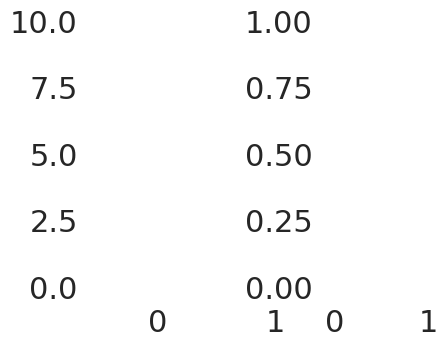

In [150]:
plot_single_time_point(summary_data_P5_P15, "percentage_artery", "mean_diff", "percentage_artery_P5_P15.pdf")
plot_single_time_point(summary_data_P5_P15, "percentage_vein", "mean_diff", "percentage_vein_P5_P15.pdf")

In [ ]:
plot_single_time_point(summary_data_P5_P8, "percentage_artery", "mean_diff", "percentage_artery_P5_P8.pdf")
#plot_single_time_point(summary_data_P5_P6, "percentage_vein", "mean_diff", "percentage_vein_P5_P6.pdf")
#plot_single_time_point(summary_data_P8_P15, "percentage_artery", "mean_diff", "percentage_artery_P8_P15.pdf")
#plot_single_time_point(summary_data_P8_P9, "percentage_vein", "mean_diff", "percentage_vein_P8_P9.pdf")
plot_single_time_point(summary_data_P5_P15, "percentage_artery", "mean_diff", "percentage_artery_P5_P15.pdf")
#plot_single_time_point(summary_data_P5_P8, "percentage_vein", "mean_diff", "percentage_vein_P5_P8.pdf")

In [156]:
control_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='control']['percentage_artery'])
control_p15 = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='control']['percentage_artery'])
SMAD4_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='SMAD4-KO']['percentage_artery'])
SMAD4_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='SMAD4-KO']['percentage_artery'])
Alk1_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='ALK1-KO']['percentage_artery'])
Alk1_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='ALK1-KO']['percentage_artery'])


plot_df = pd.DataFrame(data = {'percentage_artery':control_p8})
plot_df['condition'] = 'control P8'
temp_df = pd.DataFrame(data = {'percentage_artery':control_p15})
temp_df['condition'] = 'control P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':SMAD4_p8})
temp_df['condition'] = 'SMAD4-KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':SMAD4_p15})
temp_df['condition'] = 'SMAD4-KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':Alk1_p8})
temp_df['condition'] = 'ALK1-KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':Alk1_p15})
temp_df['condition'] = 'ALK1-KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)


#plot_df

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_artery",
                          idx=(( 'control_p8', 'control_p15'), 
                               ( 'SMAD4_P8',  'SMAD4_P15'), 
                               ( 'Alk1_P8',  'Alk1_P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig("percentage_artery_P8_P15.pdf")
test.savefig("percentage_artery_P8_P15.png")

/tmp/ipykernel_11893/3818505260.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_11893/3818505260.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_11893/3818505260.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_11893/3818505260.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_11893/3818505260.py:25: FutureWarning: The frame.append method is dep

IndexError: "control_p8" is not a group in the column `condition`. Please check `idx` and try again.

In [ ]:
#plot_df

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_vein",
                          idx=(( 'ctrl P8',  'ctrl P15'), 
                               ( 'Smad4 KO P8',   'Smad4 KO P15'), 
                               ( 'Alk1 KO P8',   'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));

test.savefig("percentage_vein_P8_P15.pdf")
test.savefig("percentage_vein_P8_P15.png")

In [ ]:
#ctr_p5p6 = np.array(summary_data_P5_P6[summary_data_P5_P6['condition']=='control']['percentage_artery'])
#ctr_p5p7 = np.array(summary_data_P5_P7[summary_data_P5_P7['condition']=='control']['percentage_artery'])
ctrl_p5p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='control']['percentage_artery'])
ctrl_p5p15 = np.array(summary_data_P5_P9[summary_data_P5_P15['condition']=='control']['percentage_artery'])
ctr_p8p15 = np.array(summary_data_P8_P9[summary_data_P8_P15['condition']=='control']['percentage_artery'])
smad4_p5p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='Smad4']['percentage_artery'])
smad4_p5p15 = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='Smad4']['percentage_artery'])
cdc42_p8p15 = np.array(summary_data_P8_P15[summary_data_P8_P15['condition']=='Smad4']['percentage_artery'])
#cdc42_p5p9  = np.array(summary_data_P5_P9[summary_data_P5_P9['condition']=='Cdc42']['percentage_artery'])
#cdc42_p8p9  = np.array(summary_data_P8_P9[summary_data_P8_P9['condition']=='Cdc42']['percentage_artery'])
#rac1_p5p6 = np.array(summary_data_P5_P6[summary_data_P5_P6['condition']=='Rac1']['percentage_artery'])
#rac1_p5p7 = np.array(summary_data_P5_P7[summary_data_P5_P7['condition']=='Rac1']['percentage_artery'])
alk1_p5p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='Alk1']['percentage_artery'])
alk1_p5p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='Alk1']['percentage_artery'])
alk1_p8p15  = np.array(summary_data_P8_P15[summary_data_P8_P15['condition']=='Alk1']['percentage_artery'])

# ctrl
#plot_df = pd.DataFrame(data = {'percentage_artery':ctr_p5p6 })
#plot_df['condition'] = 'Ctr P6 (P5)'
#temp_df = pd.DataFrame(data = {'percentage_artery':ctr_p5p7 })
#temp_df['condition'] = 'Ctr P7 (P5)'
#plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':ctrl_p5p8 })
temp_df['condition'] = 'ctrl P8 (P5)'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':ctr_p5p15})
temp_df['condition'] = 'ctrl P15 (P5)'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':ctr_p8p15})
temp_df['condition'] = 'ctrl P15 (P8)'
plot_df = plot_df.append(temp_df, ignore_index = True)

#smad4
#temp_df = pd.DataFrame(data = {'percentage_artery':cdc42_p5p6 })
#temp_df['condition'] = 'Cdc42 KO P6 (P5)'
#plot_df = plot_df.append(temp_df, ignore_index = True)
#temp_df = pd.DataFrame(data = {'percentage_artery':cdc42_p5p7 })
#temp_df['condition'] = 'Cdc42 KO P7 (P5)'
#plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':smad4_p5p8 })
temp_df['condition'] = 'Smad4 KO P8 (P5)'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':smad4_p5p15})
temp_df['condition'] = 'Smad4 KO P15 (P5)'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':smad4_p8p15})
temp_df['condition'] = 'Smad4 KO P15 (P8)'
plot_df = plot_df.append(temp_df, ignore_index = True)

#alk1
#temp_df = pd.DataFrame(data = {'percentage_artery':rac1_p5p6 })
#temp_df['condition'] = 'Rac1 KO P6 (P5)'
#plot_df = plot_df.append(temp_df, ignore_index = True)
#temp_df = pd.DataFrame(data = {'percentage_artery':rac1_p5p7 })
#temp_df['condition'] = 'Rac1 KO P7 (P5)'
#plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':alk1_p5p8 })
temp_df['condition'] = 'Alk1 KO P8 (P5)'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':alk1_p5p15})
temp_df['condition'] = 'Alk1 KO P15 (P5)'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':alk1_p8p15})
temp_df['condition'] = 'Alk1 KO P15 (P8)'
plot_df = plot_df.append(temp_df, ignore_index = True)

summary_data_cond_ts = plot_df.copy() 
summary_data_cond_ts["condition"].unique()

In [ ]:
f, axx = plt.subplots(nrows=1, ncols=1, figsize=(14, 4.5), gridspec_kw={'wspace': 0.25}) 

properties_dabest = dabest.load(data = summary_data_cond_ts, x="condition", 
                                y="percentage_artery",                      
                                idx=(('Ctr P9 (P8)', 'Cdc42 KO P9 (P8)'),
                                     ('Ctr P6 (P5)', 'Cdc42 KO P6 (P5)'),
                                     ('Ctr P7 (P5)', 'Cdc42 KO P7 (P5)'),
                                     ('Ctr P8 (P5)', 'Cdc42 KO P8 (P5)'),
                                     ('Ctr P9 (P5)', 'Cdc42 KO P9 (P5)')
                                    )
                               ) 

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(ax = axx, swarm_ylim=(0,5), contrast_ylim=(-3, 1), custom_palette = time_series_palette1);
f.savefig("ctr_vs_cdc42_ts_percentage_artery.pdf")

In [ ]:
f, axx = plt.subplots(nrows=1, ncols=1, figsize=(14, 4.5), gridspec_kw={'wspace': 0.25}) 

properties_dabest = dabest.load(data = summary_data_cond_ts, x="condition", 
                                y="percentage_artery",                      
                                idx=(('Ctr P9 (P8)', 'Rac1 KO P9 (P8)'),
                                     ('Ctr P6 (P5)', 'Rac1 KO P6 (P5)'),
                                     ('Ctr P7 (P5)', 'Rac1 KO P7 (P5)'),
                                     ('Ctr P8 (P5)', 'Rac1 KO P8 (P5)'),
                                     ('Ctr P9 (P5)', 'Rac1 KO P9 (P5)')
                                    )
                               ) 

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(ax = axx, swarm_ylim=(0,5), contrast_ylim=(-3, 1), custom_palette = time_series_palette1);
f.savefig("ctr_vs_rac1_ts_percentage_artery.pdf")

In [ ]:
properties_dabest = dabest.load(data = summary_data_ts, x="inj_time", 
                                y="percentage_artery",                      
                                idx=('P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)')) 

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
test.savefig("ctr_percentage_artery.pdf")

In [ ]:
summary_data_ts_ctr = summary_data_ts[summary_data_ts["condition"] == "control"]

properties_dabest = dabest.load(data = summary_data_ts_ctr, x="inj_time", 
                                y="percentage_artery",                      
                                idx=('P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)')) 

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
test.savefig("ctr_percentage_artery.pdf")

In [ ]:
summary_data_ts_cdc42 = summary_data_ts[summary_data_ts["condition"] == "Cdc42"]

properties_dabest = dabest.load(data = summary_data_ts_cdc42, x="inj_time", 
                                y="percentage_artery",                      
                                idx=('P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)')) 

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
test.savefig("cdc42_percentage_artery.pdf")

In [ ]:
summary_data_ts_rac1 = summary_data_ts[summary_data_ts["condition"] == "Rac1"]

properties_dabest = dabest.load(data = summary_data_ts_rac1, x="inj_time", 
                                y="percentage_artery",                      
                                idx=('P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)')) 

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
test.savefig("rac1_percentage_artery.pdf")

In [ ]:
f, axx = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), gridspec_kw={'wspace': 0.25}) # ensure proper width-wise spacing.

dabest_ctr = dabest.load(data = summary_data_ts_ctr, x="inj_time", 
                                y="percentage_artery",                      
                                idx=(#'P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)')) 
dabest_cdc42 = dabest.load(data = summary_data_ts_cdc42, x="inj_time", 
                                y="percentage_artery",                      
                                idx=(#'P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)'))
dabest_rac1 = dabest.load(data = summary_data_ts_rac1, x="inj_time", 
                                y="percentage_artery",                      
                                idx=(#'P9 (inj. P8)', 
                                     'P6 (inj. P5)', 
                                     'P7 (inj. P5)' , 
                                     'P8 (inj. P5)' , 'P9 (inj. P5)'))

dabest_ctr.mean_diff.plot(ax = axx.flat[0], swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
dabest_cdc42.mean_diff.plot(ax = axx.flat[1], swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
dabest_rac1.mean_diff.plot(ax = axx.flat[2], swarm_ylim=(0,5), contrast_ylim=(0, 3), custom_palette = time_series_palette2);
#axx[0].set_title("Ctr")
#axx[1].set_title("Cdc42 KO")
#axx[2].set_title("Rac1 KO")
f.savefig("time_series.pdf")


In [ ]:
summary_data_CTR = summary_data_CTR[summary_data_CTR["percentage_vein"] < 12.0]

properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="percentage_vein",
                         idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_venous_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot();
test.savefig("dabest_stats_result.pdf")

In [ ]:
#summary_data_CDC42 = summary_data_CDC42[summary_data_CDC42["percentage_artery"] < 2.0]

properties_dabest = dabest.load(data = summary_data_CDC42, x="time_interval", y="percentage_artery",
                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 5), contrast_ylim=(0, 3));
test.savefig("cdc42_percentage_artery.pdf")

In [ ]:
properties_dabest = dabest.load(data = summary_data_CDC42, x="time_interval", y="percentage_vein",
                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot();
test.savefig("dabest_stats_result.pdf")

In [ ]:
print(summary_data_RAC1[summary_data_RAC1['time_interval']=='P8_P9']["percentage_artery"].max())
print(summary_data_RAC1[summary_data_RAC1['time_interval']=='P5_P6']["percentage_artery"].max())


properties_dabest = dabest.load(data = summary_data_RAC1, x="time_interval", y="percentage_artery",
                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot();
test.savefig("dabest_stats_result.pdf")

In [ ]:
properties_dabest = dabest.load(data = summary_data_RAC1, x="time_interval", y="percentage_vein",
                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot();
test.savefig("dabest_stats_result.pdf")

In [ ]:
c1 = summary_data_CTR[summary_data_CTR["time_interval"] == "P5_P6"]["percentage_artery"]
c2 = summary_data_CTR[summary_data_CTR["time_interval"] == "P8_P9"]["percentage_artery"]
c3 = summary_data_CTR[summary_data_CTR["time_interval"] == "P5_P9"]["percentage_artery"]

t1 = summary_data_CTR[summary_data_CTR["time_interval"] == "P5_P6"]["percentage_vein"]
t2 = summary_data_CTR[summary_data_CTR["time_interval"] == "P8_P9"]["percentage_vein"]
t3 = summary_data_CTR[summary_data_CTR["time_interval"] == "P5_P9"]["percentage_vein"]

plot_CTR = pd.DataFrame({'P5_P6' : c1,     'Test 1' : t1,
                 'P8_P9' : c2,     'Test 2' : t2,
                 'P5_P9' : c3,     'Test 3' : t3
                })

In [ ]:
plot_CTR